In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from itertools import starmap

from tensorflow.keras import layers
from tensorflow.keras import losses

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../input/nlp-getting-started/train.csv')
data.info

<bound method DataFrame.info of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


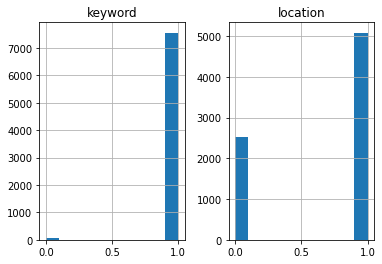

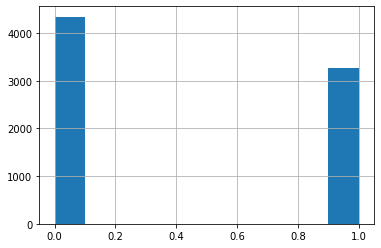

In [4]:
data[['keyword', 'location']].notnull().astype(int).hist()
plt.show()
data['target'].hist()
plt.show()

In [5]:
len(np.unique(data['keyword'].astype(str)))

222

In [6]:
print(data['text'][1])

Forest fire near La Ronge Sask. Canada


In [7]:
df_train, df_test, tar_train, tar_test = train_test_split(data['text'], data['target'], test_size=0.20, random_state=42)

In [8]:
df_train

4996    Courageous and honest analysis of need to use ...
3263    @ZachZaidman @670TheScore wld b a shame if tha...
4907    Tell @BarackObama to rescind medals of 'honor'...
2855    Worried about how the CA drought might affect ...
4716    @YoungHeroesID Lava Blast &amp; Power Red #Pan...
                              ...                        
5226    @Eganator2000 There aren't many Obliteration s...
5390    just had a panic attack bc I don't have enough...
860     Omron HEM-712C Automatic Blood Pressure Monito...
7603    Officials say a quarantine is in place at an A...
7270    I moved to England five years ago today. What ...
Name: text, Length: 6090, dtype: object

In [9]:
max_features = 20000
sequence_length = 300

vectorize_layer = layers.TextVectorization(
    standardize='lower_and_strip_punctuation',
    max_tokens = max_features,
    output_mode = 'int',
    output_sequence_length = sequence_length
)

2022-09-24 17:23:07.156579: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
vectorize_layer.adapt(df_train)

2022-09-24 17:23:07.298946: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [11]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [12]:
first_tweet = df_train.iloc[0]
first_target = tar_train.iloc[0]
print('Tweet', first_tweet)
print('Target', first_target)
print('Vectorized Tweet', vectorize_text(first_tweet, first_target))

Tweet Courageous and honest analysis of need to use Atomic Bomb in 1945. #Hiroshima70 Japanese military refused surrender. https://t.co/VhmtyTptGR
Target 1
Vectorized Tweet (<tf.Tensor: shape=(1, 300), dtype=int64, numpy=
array([[17198,     8,  4962,  2917,     6,   156,     5,   438,   216,
          118,     4,  2377,  4973,  1177,   240,  4381,  4119, 14803,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     

In [13]:
print('Word 110 = ', vectorize_layer.get_vocabulary()[17198])
print('Word 6241 = ', vectorize_layer.get_vocabulary()[8])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

Word 110 =  courageous
Word 6241 =  and
Vocabulary size: 19422


In [14]:
raw_train_ds = zip(df_train, tar_train)
raw_test_ds = zip(df_test, tar_test)

In [15]:
train_ds = list(starmap(vectorize_text, raw_train_ds))
test_ds = list(starmap(vectorize_text, raw_test_ds))

In [16]:
train_ds[0]

(<tf.Tensor: shape=(1, 300), dtype=int64, numpy=
 array([[17198,     8,  4962,  2917,     6,   156,     5,   438,   216,
           118,     4,  2377,  4973,  1177,   240,  4381,  4119, 14803,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,